In [42]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
#https://www.projectpro.io/article/how-to-build-arima-model-in-python/544


              price
date               
2022-10-21  19162.6
2022-10-22  19204.8
2022-10-23  19571.2
2022-10-24  19331.5
2022-10-25  20073.1


C:\Users\16474\AppData\Local\Temp\ipykernel_18096\2599259713.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


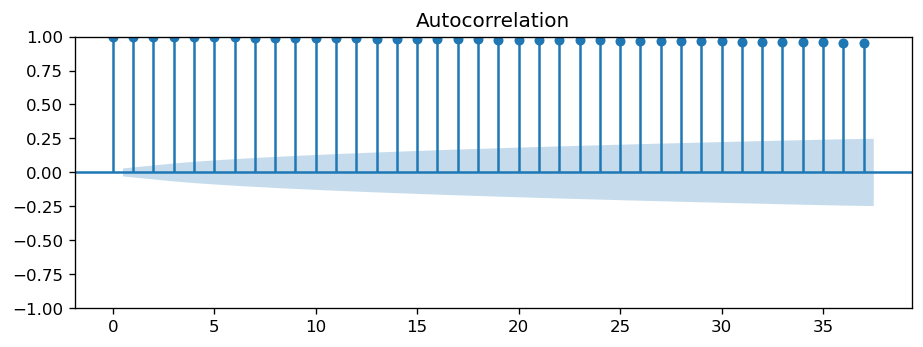

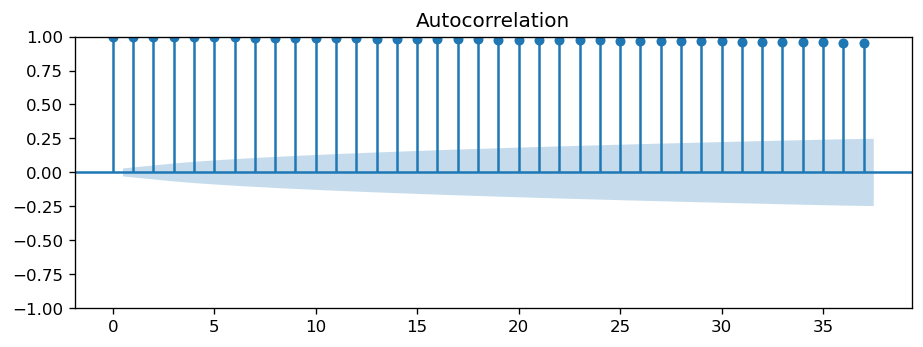

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_acf(df.price)


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


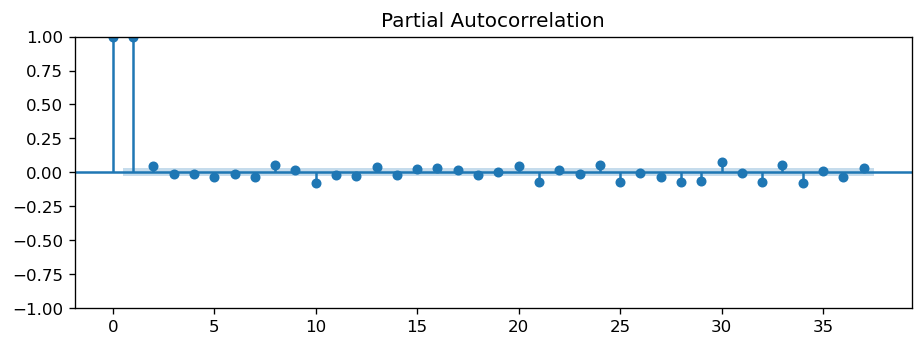

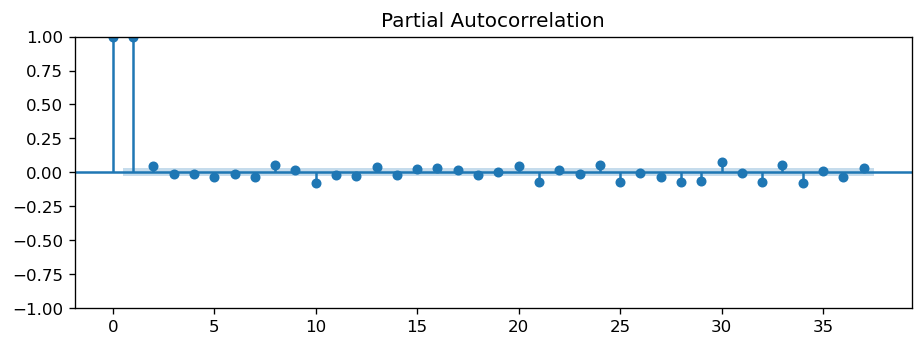

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_pacf(df.price)

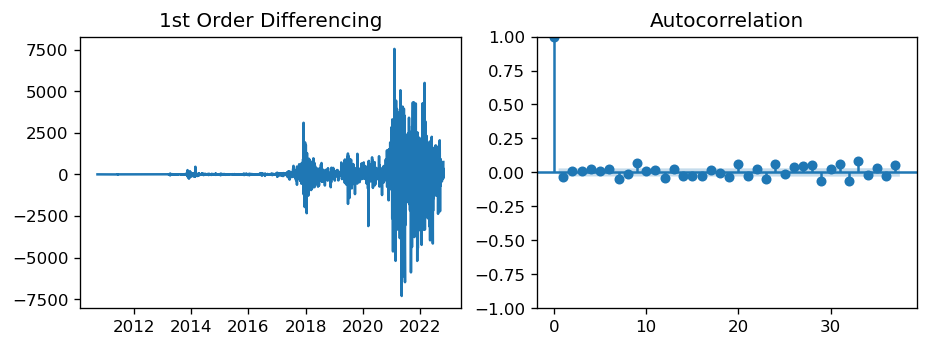

In [45]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_acf(df.price.diff().dropna(), ax=ax2)
plt.show()

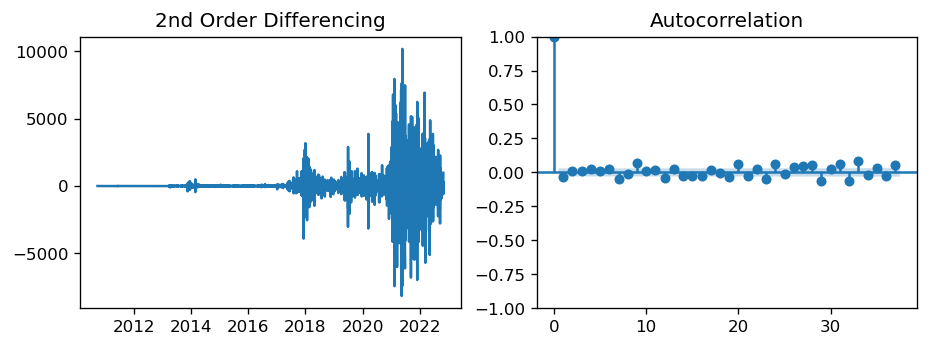

In [46]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.price.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [47]:
result = adfuller(df.price.dropna())
print('p-value', result[1])

result = adfuller(df.price.diff().dropna())
print('p-value', result[1])

result = adfuller(df.price.diff().diff().dropna())
print('p-value', result[1])

p-value 0.3958551417121587
p-value 7.278050522529046e-19
p-value 0.0


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


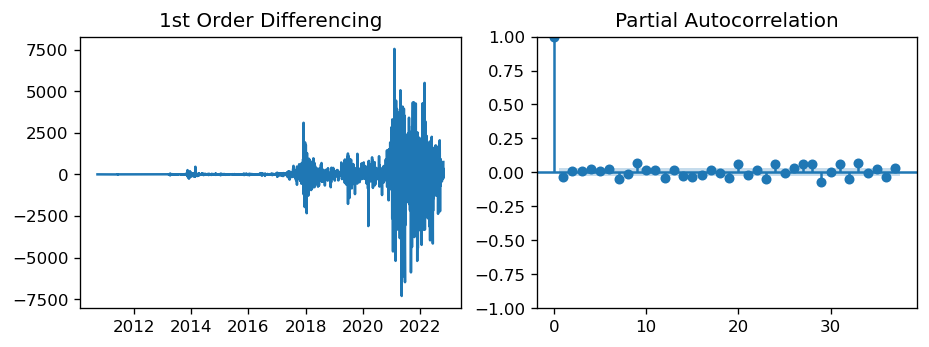

In [48]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.price.diff().dropna(), ax=ax2)
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


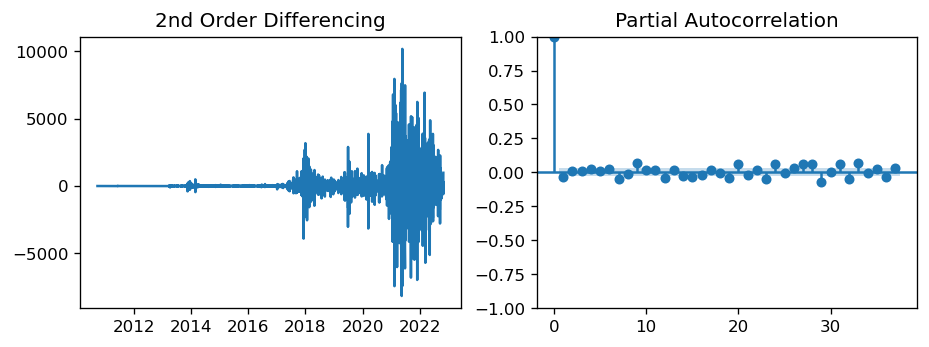

In [49]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.price.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [50]:
arima_model = ARIMA(df.price, order = (1,1,2))
model = arima_model.fit()
print(model.summary())

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 4386
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -34707.176
Date:                Thu, 03 Nov 2022   AIC                          69422.352
Time:                        20:53:16   BIC                          69447.896
Sample:                             0   HQIC                         69431.364
                               - 4386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9647      0.014     71.323      0.000       0.938       0.991
ma.L1         -1.0018      0.014    -69.672      0.000      -1.030      -0.974
ma.L2          0.0441      0.007      6.787      0.0

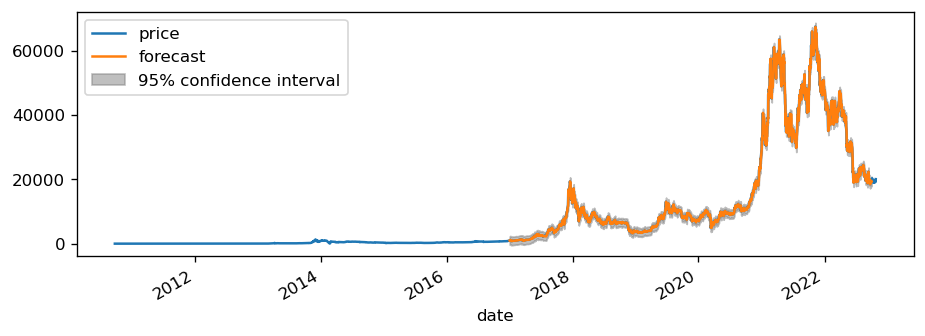

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, ax = plt.subplots()
ax = df.loc['2010':].plot(ax=ax)
plot_predict(model, '2017-01-01', '2022-10-01', ax=ax)

plt.show()